In [1]:
import cv2

In [1]:
# https://docs.opencv.org/4.3.0/dc/d2e/tutorial_py_image_display.html

In [11]:
src = cv2.imread('.\\images\\giraffe.jpg')

In [12]:
b,g,r = cv2.split(src)

In [13]:
reverse_img = cv2.merge((r,g,b))

In [14]:
cv2.imshow('Image', reverse_img)
cv2.waitKey(0) # 0 forever 
cv2.destroyAllWindows()

In [17]:
src = cv2.imread('.\\images\\giraffe.jpg')#[..., ::-1]  # OpenCV image (BGR to RGB)

In [18]:
cv2.imshow('Image', src)
cv2.waitKey(0) # 0 forever 
cv2.destroyAllWindows()

In [2]:
original = cv2.imread('.\\images\\elephant2.png', cv2.IMREAD_COLOR)

In [3]:
gray = cv2.imread('.\\images\\elephant2.png', cv2.IMREAD_GRAYSCALE)
unchange = cv2.imread('.\\images\\elephant2.png', cv2.IMREAD_UNCHANGED)

In [4]:
cv2.imshow('Original', original)
cv2.imshow('Gray', gray)
cv2.imshow('Unchange', unchange)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
unchange.shape

(532, 946, 4)

In [ ]:
#BGR

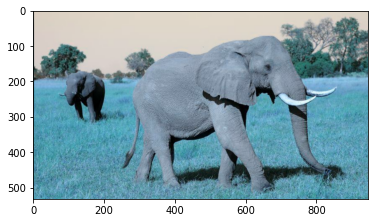

In [6]:
import matplotlib.pyplot as plt

plt.imshow(original)
plt.show()

In [8]:
# BGR to RGB
src_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

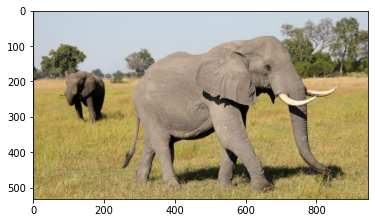

In [9]:
plt.imshow(src_rgb)
plt.show()

In [ ]:
# Another method

In [10]:
original2 = cv2.imread('.\\images\\elephant2.png', cv2.IMREAD_COLOR)[..., ::-1]

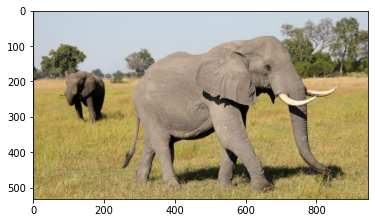

In [11]:
plt.imshow(original2)
plt.show()

### Bitwise Operations

### 배경을 지우거나 뭔가를 찾아내기 위해 사용 AND OR NOT XOR
###
###
###
###
### src1 src2 dst: 결과파일 mask: 적용 영역 지정

# https://docs.opencv.org/4.3.0/d0/d86/tutorial_py_image_arithmetics.html
# https://github.com/opencv/opencv

In [1]:
import cv2
import numpy as np
 
# 이미지 읽어오기
src1 = cv2.imread('.\\images\\messi5.jpg')
src2 = cv2.imread('.\\images\\opencv-logo-white.png')
cv2.imshow('src2',  src2)

In [2]:
 
#1 
rows,cols,channels = src2.shape	 # 삽입할 이미지의 row, col, channel정보
roi = src1[0:rows, 0:cols]	# 관심영역 지정
 
#2
# 로고 이미지를 grayscale하기
gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
 
# cv2.threshold(gray이미지, 임계값, 임계값보다 클 때 적용할 값, thresholding 타입)
# THRESH_BINARY : 픽셀값이 임계값(160)보다 크면 value(255, 흰색)이고 아니면 0(검정색)으로 바꾸기
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
 
#print(ret, type(ret))   # 160.0, <class 'float'>
#print(mask, type(mask)) # threshold된 이미지(흑백 이미지), <class 'numpy.ndarray'>
 
# 부정(bitwise_not)연산 : not연산(반대로 하기)
mask_inv = cv2.bitwise_not(mask)
 
cv2.imshow('mask',  mask)	# 부정(bitwise_not)연산 전
cv2.imshow('mask_inv',  mask_inv)	# 부정(bitwise_not)연산 후
 
#3
# 논리곱(bitwise_and) : and연산(둘다 1일 때만 1이 됨)
# mask의 값이 0(검정색)이 아닌 부분에서만 roi, roi를 and연산 진행
# roi에서 로고에 해당하는 부분만 검정색으로 만들기
src1_bg = cv2.bitwise_and(roi, roi, mask = mask)
 
cv2.imshow('src1_bg',  src1_bg)
 
#4
# 논리곱(bitwise_and) : and연산(둘다 1일 때만 1이 됨)
# mask의 값이 0(검정색)이 아닌 부분에서만 src2, src2를 and연산 진행
# 로고 이미지에서 로고 부분만 추출
src2_fg = cv2.bitwise_and(src2, src2, mask = mask_inv)
 
cv2.imshow('src2_fg',  src2_fg)
 
#5
# 논리합(bitwise_or) : or연산(둘 중 하나만 1이면 1이 됨)
# dst = cv2.add(src1_bg, src2_fg)로 논리합(bitwise_or)연산 대체 가능
# 로고 이미지 배경을 투명으로 만들고 roi에 로고 이미지 넣기
dst = cv2.bitwise_or(src1_bg, src2_fg)
 
cv2.imshow('dst',  dst)
 
#6 최종적인 이미지 생성
src1[0:rows, 0:cols] = dst	# 관심 영역을 원본에 붙여넣기
 
cv2.imshow('result',src1)
cv2.waitKey(0)
cv2.destroyAllWindows()